In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
compras_df= pd.read_csv('C:/Users/HP/Documents/IA/data/clean_compras.csv')

In [4]:
compras_df.head(5)


,C B,BENEFICIARIO,RFC,FACTURA,CONTRATO,CONCEPTO,TIPO,FDO-#OP,FECHA,IMPORTE,SHEET,Mes
0,123803,COLEGIO DE INGENIEROS CIVILES DE NUEVO LEON AC,CIC710521SA1,P 1214-185004-4,SIS-172-2022,RP-2023 30% ANT. SRSIS-RP-06/22-IR 1)LEV. TOPO...,TR,1025275.0,2023-01-30,389093.21,OBRA PUBLICA Y GV FDOS. ESP,Enero
1,206273,TESORERIA DE LA FEDERACION,SAT970701NN3,124000760-183001-8,NO APLICA,PAGO DE DERECHOS A FAVOR DE LA SECRETARIA DE I...,TR,1025278.0,2023-01-30,6564.00,OBRA PUBLICA Y GV FDOS. ESP,Enero
2,206273,TESORERIA DE LA FEDERACION,SAT970701NN3,124000771-183001-7,NO APLICA,PAGO DE DERECHOS A FAVOR DE LA SRIA. DE INFRAE...,TR,1025279.0,2023-01-30,6418.00,OBRA PUBLICA Y GV FDOS. ESP,Enero
3,206273,TESORERIA DE LA FEDERACION,SAT970701NN3,183006-1,NO APLICA,REINTEGRO DEL IMPORTE NO COMPROMETIDO AL 31 DE...,TR,332000144.0,2023-01-30,110220.65,OBRA PUBLICA Y GV FDOS. ESP,Enero
4,206273,TESORERIA DE LA FEDERACION,SAT970701NN3,183006-2,NO APLICA,REINTEGRO DE PRODUCTOS FINANCIEROS AL 31 DE DI...,TR,332000145.0,2023-01-30,400123.00,OBRA PUBLICA Y GV FDOS. ESP,Enero


# Visión general del Dataset

In [5]:
compras_df.columns

Index(['C B', 'BENEFICIARIO', 'RFC', 'FACTURA', 'CONTRATO', 'CONCEPTO', 'TIPO',
       'FDO-#OP', 'FECHA', 'IMPORTE', 'SHEET', 'Mes'],
      dtype='object')

In [6]:
compras_df.dtypes

C B               int64
BENEFICIARIO     object
RFC              object
FACTURA          object
CONTRATO         object
CONCEPTO         object
TIPO             object
FDO-#OP         float64
FECHA            object
IMPORTE         float64
SHEET            object
Mes              object
dtype: object

In [7]:
compras_df.describe()

,C B,FDO-#OP,IMPORTE
count,17530.000000,1.753000e+04,1.753000e+04
mean,230356.014375,1.682974e+08,4.680773e+05
std,97400.825610,1.737286e+08,2.426644e+06
min,110036.000000,1.025264e+06,1.000000e+00
25%,120642.000000,1.027496e+06,3.857370e+03
50%,214873.000000,1.110585e+06,1.972144e+04
75%,318536.000000,3.510004e+08,1.189144e+05
max,999999.000000,6.040001e+08,1.013855e+08


In [8]:
compras_df= compras_df[['BENEFICIARIO', 'FACTURA', 'CONTRATO', 'TIPO', 'FECHA', 'IMPORTE', 'SHEET', 'CONCEPTO', 'Mes']]

In [9]:
compras_df.head(4)

,BENEFICIARIO,FACTURA,CONTRATO,TIPO,FECHA,IMPORTE,SHEET,CONCEPTO,Mes
0,COLEGIO DE INGENIEROS CIVILES DE NUEVO LEON AC,P 1214-185004-4,SIS-172-2022,TR,2023-01-30,389093.21,OBRA PUBLICA Y GV FDOS. ESP,RP-2023 30% ANT. SRSIS-RP-06/22-IR 1)LEV. TOPO...,Enero
1,TESORERIA DE LA FEDERACION,124000760-183001-8,NO APLICA,TR,2023-01-30,6564.00,OBRA PUBLICA Y GV FDOS. ESP,PAGO DE DERECHOS A FAVOR DE LA SECRETARIA DE I...,Enero
2,TESORERIA DE LA FEDERACION,124000771-183001-7,NO APLICA,TR,2023-01-30,6418.00,OBRA PUBLICA Y GV FDOS. ESP,PAGO DE DERECHOS A FAVOR DE LA SRIA. DE INFRAE...,Enero
3,TESORERIA DE LA FEDERACION,183006-1,NO APLICA,TR,2023-01-30,110220.65,OBRA PUBLICA Y GV FDOS. ESP,REINTEGRO DEL IMPORTE NO COMPROMETIDO AL 31 DE...,Enero


# Analisis unidimensional

## Conteo de ocurrencia de una varible

In [10]:
compras_df['SHEET'].value_counts()

SHEET
OBRA PUBLICA Y GV FDOS. ESP    9141
GTS VARIOS                     3100
GTOS VARIOS                    1859
SERV PERS                      1786
COMUNICACION                    514
COMUNIC                         483
CUMUNICACION                    257
SERV PROF                       247
SER PROF                         75
GTS REPRESENT                    58
GTS REPRE                        10
Name: count, dtype: int64

# Determinar la cantidad de valores únicos

In [11]:
compras_df['SHEET'].unique()

array(['OBRA PUBLICA Y GV FDOS. ESP', 'GTS VARIOS', 'SERV PROF',
       'SERV PERS', 'COMUNICACION', 'GTS REPRE', 'GTS REPRESENT',
       'COMUNIC', 'CUMUNICACION', 'GTOS VARIOS', 'SER PROF'], dtype=object)

In [12]:
compras_df['TIPO'].unique()

array(['TR', 'CH'], dtype=object)

## El número de pagos por proveedor

In [13]:
compras_df['BENEFICIARIO'].value_counts()[0:10]

BENEFICIARIO
CAMARA MEXICANA DE LA INDUSTRIA DE LA CONSTRUCCION    3018
CAR ONE MONTERREY, S.A. DE C.V.                        533
INTERASFALTOS, S.A. DE C.V.                            451
MOTO SOLUCIONES MEXICO, S.A. DE C.V.                   325
MUNICIPIO DE LA CIUDAD DE MONTERREY                    252
SUPERLLANTAS SANTO DOMINGO, S.A. DE C.V.               233
EDITORA EL SOL, S.A. DE C.V.                           209
HISA FARMACEUTICA, S.A. DE C.V.                        199
GARCIA ZAVALA EDGAR ALEJANDRO JOBERAGAN                182
HOSPITAL SAN FELIPE DE JESUS S.C.                      166
Name: count, dtype: int64

### Análisis numérico de la variable IMPORTE mediante un histograma

<Axes: >

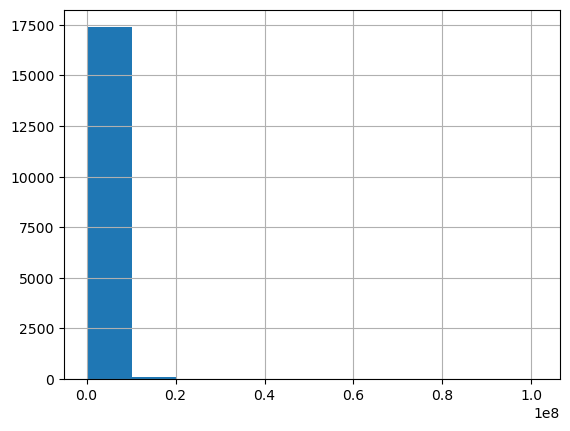

In [14]:
compras_df['IMPORTE'].hist()

### Histograma de los valores de la columna 'IMPORTE' filtrando previamente los importes que se encuentran por debajo del percentil 95.

<Axes: >

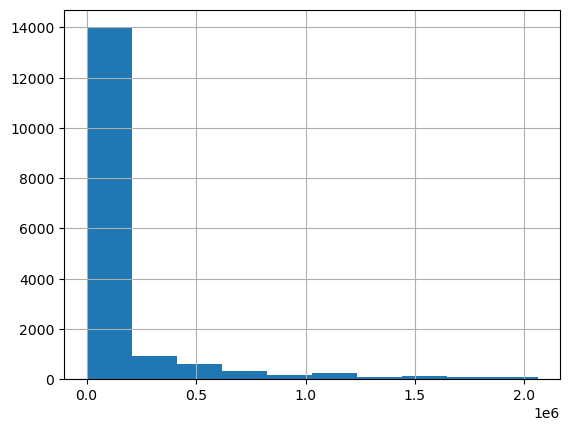

In [15]:
compras_df[compras_df['IMPORTE']< compras_df['IMPORTE'].quantile(0.95)]['IMPORTE'].hist()

### Dividir el gráfico anterior en 30 intervalos

<Axes: >

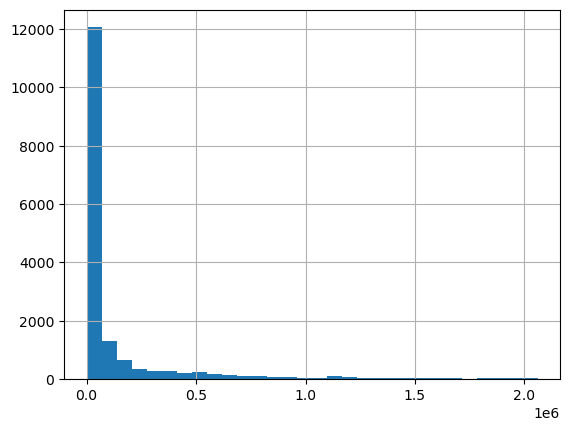

In [16]:
compras_df[compras_df['IMPORTE']< compras_df['IMPORTE'].quantile(0.95)]['IMPORTE'].hist(bins=30)

In [17]:
compras_df[compras_df['IMPORTE']< compras_df['IMPORTE'].quantile(0.95)].head(5)

,BENEFICIARIO,FACTURA,CONTRATO,TIPO,FECHA,IMPORTE,SHEET,CONCEPTO,Mes
0,COLEGIO DE INGENIEROS CIVILES DE NUEVO LEON AC,P 1214-185004-4,SIS-172-2022,TR,2023-01-30,389093.21,OBRA PUBLICA Y GV FDOS. ESP,RP-2023 30% ANT. SRSIS-RP-06/22-IR 1)LEV. TOPO...,Enero
1,TESORERIA DE LA FEDERACION,124000760-183001-8,NO APLICA,TR,2023-01-30,6564.00,OBRA PUBLICA Y GV FDOS. ESP,PAGO DE DERECHOS A FAVOR DE LA SECRETARIA DE I...,Enero
2,TESORERIA DE LA FEDERACION,124000771-183001-7,NO APLICA,TR,2023-01-30,6418.00,OBRA PUBLICA Y GV FDOS. ESP,PAGO DE DERECHOS A FAVOR DE LA SRIA. DE INFRAE...,Enero
3,TESORERIA DE LA FEDERACION,183006-1,NO APLICA,TR,2023-01-30,110220.65,OBRA PUBLICA Y GV FDOS. ESP,REINTEGRO DEL IMPORTE NO COMPROMETIDO AL 31 DE...,Enero
4,TESORERIA DE LA FEDERACION,183006-2,NO APLICA,TR,2023-01-30,400123.00,OBRA PUBLICA Y GV FDOS. ESP,REINTEGRO DE PRODUCTOS FINANCIEROS AL 31 DE DI...,Enero


### Realice además dos análisis adicionales de dos variables

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'OBRA PUBLICA Y GV FDOS. ESP'),
  Text(1, 0, 'GTS VARIOS'),
  Text(2, 0, 'SERV PROF'),
  Text(3, 0, 'SERV PERS'),
  Text(4, 0, 'COMUNICACION'),
  Text(5, 0, 'GTS REPRE'),
  Text(6, 0, 'GTS REPRESENT'),
  Text(7, 0, 'COMUNIC'),
  Text(8, 0, 'CUMUNICACION'),
  Text(9, 0, 'GTOS VARIOS'),
  Text(10, 0, 'SER PROF')])

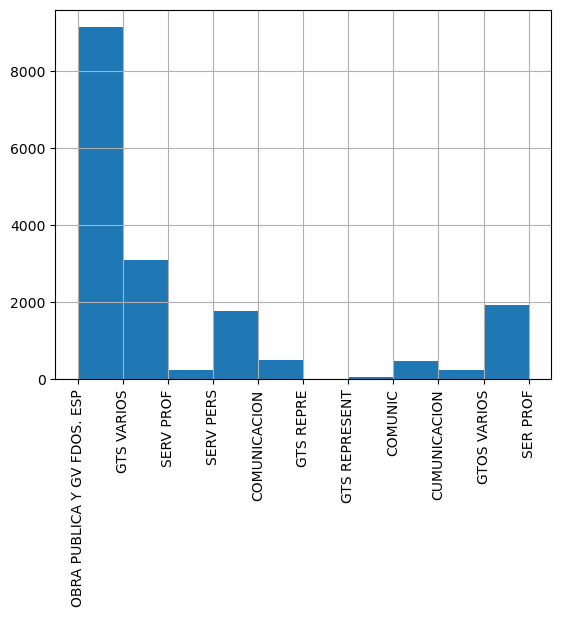

In [18]:
compras_df['SHEET'].hist()
plt.xticks(rotation=90)

([0, 1], [Text(0, 0, 'TR'), Text(1, 0, 'CH')])

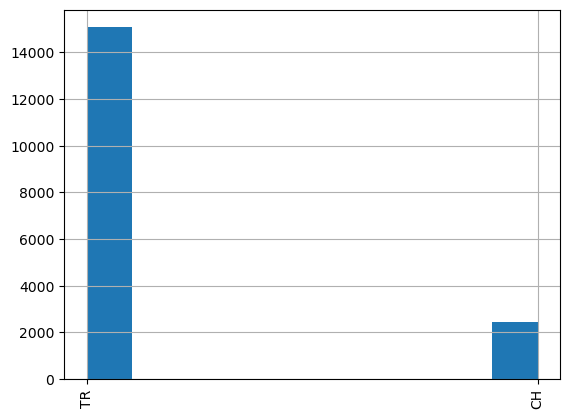

In [19]:
compras_df['TIPO'].hist()
plt.xticks(rotation=90)

## Analisis multidimensional

### Beneficiarios con mayor carga económica.

In [20]:
sum_importe_beneficiario=compras_df.groupby('BENEFICIARIO').sum()['IMPORTE']

In [21]:
sum_importe_beneficiario.head(5)

BENEFICIARIO
50 PRODUCCIONES, S.A DE C.V         11422.09
8ENRED, S DE R.L. DE C.V.          638000.00
A&T IMPORTACIONES, S.A. DE C.V.    353808.40
ABREGO TORRES CAROLINA              12995.90
ABUNDIS  ALBERTO                   479431.23
Name: IMPORTE, dtype: float64

<Axes: xlabel='BENEFICIARIO'>

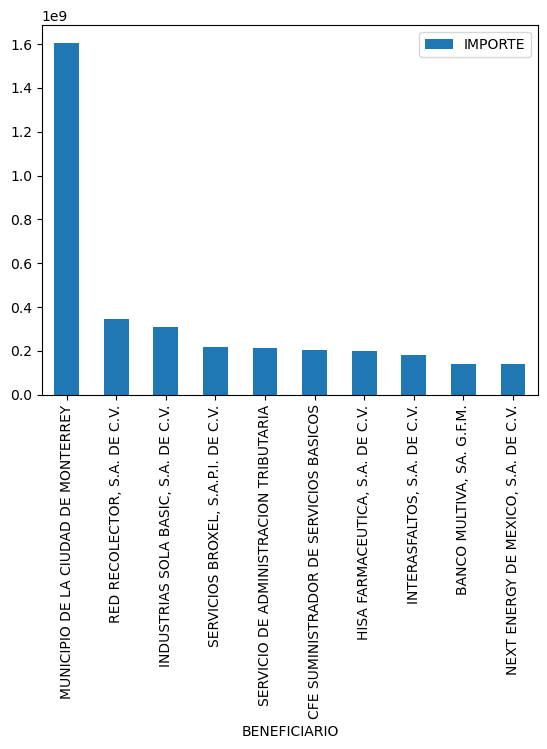

In [22]:
sum_importe_beneficiario.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10].plot(kind='bar', x='BENEFICIARIO',y='IMPORTE')

### Determinar el gasto promedio por cada categoría o por hoja de Excel.

In [23]:
mean_importe_sheet=compras_df.groupby('SHEET')['IMPORTE'].mean()

In [24]:
mean_importe_sheet.head(4)

SHEET
COMUNIC          91601.111491
COMUNICACION     87179.130019
CUMUNICACION     44166.224125
GTOS VARIOS     732914.265008
Name: IMPORTE, dtype: float64

<Axes: xlabel='SHEET'>

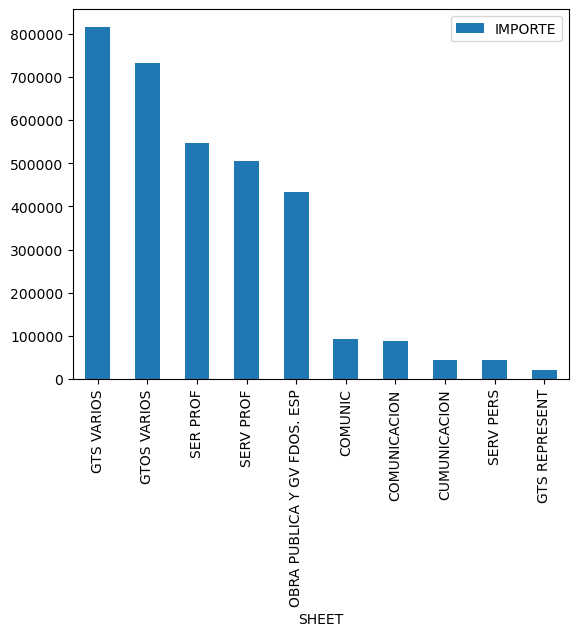

In [25]:
mean_importe_sheet.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10].plot(kind='bar', x='SHEET',y='IMPORTE')

### Determinar los gastos por fecha

In [26]:
# Convertir la columna 'FECHA' a formato de fecha
compras_df_fecha=compras_df.groupby('Mes').sum()['IMPORTE']
compras_df_fecha

Mes
Abril         4.593973e+08
Agosto        8.895197e+08
Diciembre     1.343109e+09
Enero         2.547770e+08
Febrero       3.769043e+08
Julio         6.487442e+08
Junio         7.747450e+08
Marzo         1.134178e+09
Mayo          3.801041e+08
Noviembre     7.456701e+08
Octubre       4.006487e+08
Septiembre    7.975973e+08
Name: IMPORTE, dtype: float64

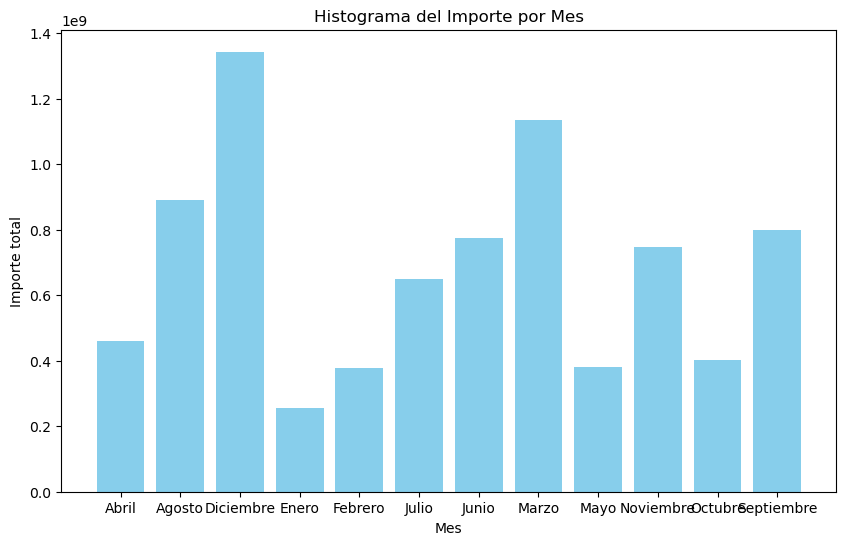

In [27]:
# Agrupar por mes y sumar el importe
importe_por_mes = compras_df.groupby('Mes')['IMPORTE'].sum()

# Graficar el histograma
plt.figure(figsize=(10, 6))
plt.bar(importe_por_mes.index, importe_por_mes.values, color='skyblue')
plt.xlabel('Mes')
plt.ylabel('Importe total')
plt.title('Histograma del Importe por Mes')
plt.xticks(importe_por_mes.index)  # Para mostrar los meses en el eje X
plt.show()

### Realizar dos análisis multidimensionales adicionales

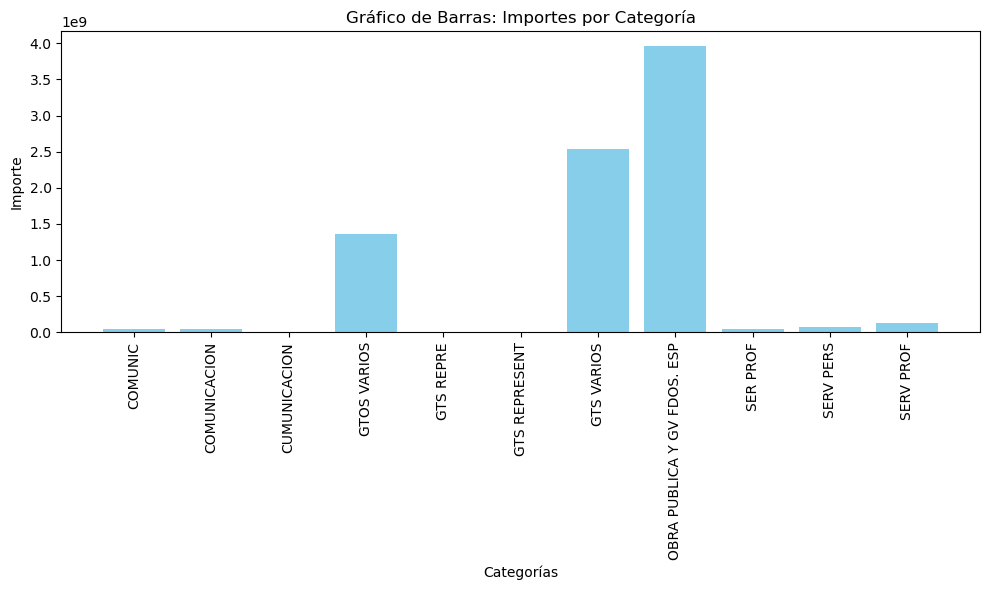

In [28]:
# Categoria con mayor importe
compras_2=compras_df.groupby('SHEET').sum()['IMPORTE']
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  
plt.bar(compras_2.index, compras_2.values, color='skyblue')

plt.xticks(rotation=90)  
plt.xlabel('Categorías')
plt.ylabel('Importe')
plt.title('Gráfico de Barras: Importes por Categoría')

plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se corten
plt.show()

In [40]:
# Importe por contrato y beneficiario
df_contratos=compras_df.groupby(['CONTRATO','BENEFICIARIO']).sum()['IMPORTE']

df_contratos


CONTRATO                             BENEFICIARIO                                          
.SFA-010-2022                        ORSAN DEL NORTE, S.A. DE C.V.                             7.627323e+05
DASSPC/2089/2023                     CENTRO INTERNACIONAL DE NEGOCIOS MONTERREY, A.C.          1.561990e+04
DASSPC/3209/2022                     CENTRO INTERNACIONAL DE NEGOCIOS MONTERREY, A.C.          2.993650e+03
DEG/003/02                           PROMOTORA AMBIENTAL DE LA LAGUNA, SA.DE CV.               1.306602e+07
DERIVADO DE LA ORDEN DE COMPRA 9121  TTQ DE MONTERREY, S.A. DE C.V.                            8.804400e+04
                                                                                                   ...     
TES-075-2014                         F/4086906 BBVA BANCOMER, SA.                              2.526361e+07
TES-075/2014                         F/4086906 BBVA BANCOMER, SA.                              2.128340e+06
TES-217-2020                         NEXT EN

<Figure size 1200x800 with 0 Axes>

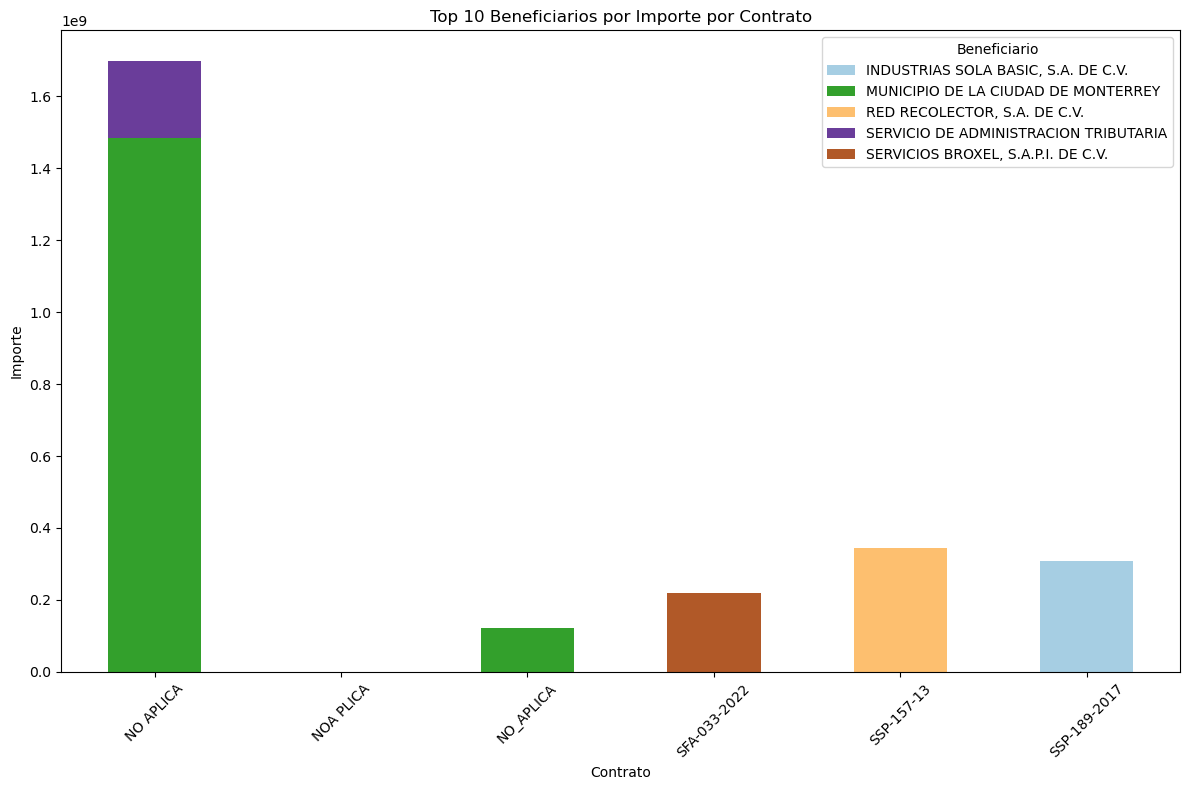

In [42]:
# Convertir a DataFrame y deshacer el índice
df_contratos = df_contratos.reset_index()

# Calcular el total por beneficiario
total_beneficiario = df_contratos.groupby('BENEFICIARIO')['IMPORTE'].sum().nlargest(5)

# Filtrar los contratos de estos beneficiarios
top_beneficiarios = total_beneficiario.index
df_top_contratos = df_contratos[df_contratos['BENEFICIARIO'].isin(top_beneficiarios)]

# Crear una tabla pivot para el gráfico
pivot_df = df_top_contratos.pivot(index='CONTRATO', columns='BENEFICIARIO', values='IMPORTE').fillna(0)

# Crear gráfico de barras apiladas
plt.figure(figsize=(12, 8))
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Paired')

# Personalizar el gráfico
plt.title('Top 10 Beneficiarios por Importe por Contrato')
plt.xlabel('Contrato')
plt.ylabel('Importe')
plt.xticks(rotation=45)  # Rotar las etiquetas en el eje X
plt.legend(title='Beneficiario')  # Título de la leyenda
plt.tight_layout()  # Ajustar el diseño

# Mostrar el gráfico
plt.show()


# Análisis de texto

In [43]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('spanish'))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
--!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   -- ------------------------------------ 20.5/300.2 kB 330.3 kB/s eta 0:00:01
   -- ------------------------------------ 20.5/300.2 kB 330.3 kB/s eta 0:00:01
   --- ----------------------------------- 30.7/300.2 kB 217.9 kB/s eta 0:00:02
   --- ----------------------------------- 30.7/300.2 kB 217.9 kB/s eta 0:00:02
   --- ----------------------------------- 30.7/300.2 kB 217.9 kB/s eta 0:00:02
   --- ----------------------------------- 30.7/300.2 kB 217.9 kB/s eta 0:00:02
   --- ----------------------------------- 30.7/300.2 kB 217.9 kB/s eta 0:00:02
   --- ----------------------------------- 30.7/300.2 kB 217.9 kB/s eta 0:00:02
   --- ----------------------------------- 30.7/300.2 kB 217.9 kB/s eta 0:00:02
   --- ----------------------------------- 30.7/300.2 kB 217.9 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/300.2 kB 102.4 kB/s eta 0:00:03
   ----------- --------------------------- 92.2/3

In [129]:
texto_compras=''

In [130]:
for row in compras_df['CONCEPTO']:
    texto_compras=texto_compras+ ' '+ row
    

In [150]:
stopwords_list= stopwords.words('spanish')+['2023', 'cont', 'millar', 'dpp', 'diciembre','municipio', 'león', 'monterrey']

In [151]:
texto_compras=' '.join([x for x in texto_compras.strip().lower().split(' ') if x not in stopwords_list and len(x)>4])


In [152]:
wc = WordCloud(background_color= 'white')
wc.generate(texto_compras)

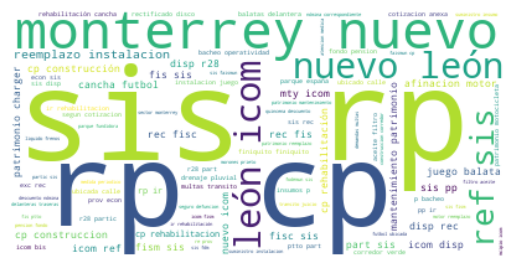

In [153]:
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()